## Logistic Regression

In [17]:
import numpy as np
import scipy.optimize as opt  
            

class LogisticRegression:
    def __init__(self):
        self.__theta = None
        self.__trainDone = False

    @staticmethod
    def compute_cost(theta, X, Y, l=0):
        theta = np.matrix(theta)
        print(theta.shape)
        m,n = X.shape
        z = X*theta.T
        hypothesis = LogisticRegression.sigmoid(z)
        temp_theta = theta[1:n]
        regularization_term = (l/2.0) * np.sum(np.power(temp_theta, 2))
        J = (-1.0/m)*(Y.T*np.log(hypothesis) +((1-Y).T)*np.log(1-hypothesis) + regularization_term)
        return J

    @staticmethod
    def compute_gradient(theta, X, Y, l=0):
        m = X.shape[0]
        theta = np.matrix(theta)
        hypothesis = LogisticRegression.sigmoid(X * theta.T)
        error = hypothesis - Y
        regularization_term = l * np.sum(theta.T)
        grad = (1.0 / m) * ( X.T*error + regularization_term)
        return grad


    @staticmethod
    def sigmoid(z):
        h = np.matrix(1.0/(1.0+ np.power(np.e,-1*z)))
        return h

    def optm(self, X, Y):
        X = np.matrix(np.insert(X, 0, 1, axis=1))
        n = X.shape[1]
        theta = np.matrix(np.zeros(shape=(n,1), dtype='float'))
        print(theta.shape)
        result = opt.fmin_tnc(func=LogisticRegression.compute_cost, x0=theta, fprime=LogisticRegression.compute_gradient, args=(X, Y))  
        print(result)
            
    def predict(self, X):
        if self._trainDone:
            X = np.insert(X, 0, 1, axis=1)
            m = X.shape[0]
            Y = np.matrix(np.zeros(shape=(m,1),dtype='float'))
#             self.__theta = np.matrix([[-22.27078586],[  0.6339444 ],[  0.3360944 ]])
            Y[:, 0]=LogisticRegression.sigmoid(X*self.__theta)
            res_Y = Y>0.5
            return res_Y
        else:
            print("First train the classifier to make predictons")
            return

    def accuracy(self, predicted, actual):
        acc=0
        n = predicted.shape[0]
        for i in range(n):
            if predicted[i] == actual[i]:
                acc+=1
        acc/=n
        return acc

Here we will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

/home/hackingbot/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv('../data/classification_1.txt', header=None)
df = df.rename(columns={0:'Exam1',
                   1:'Exam2',
                   2:'Label'})
df.head()

,Exam1,Exam2,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


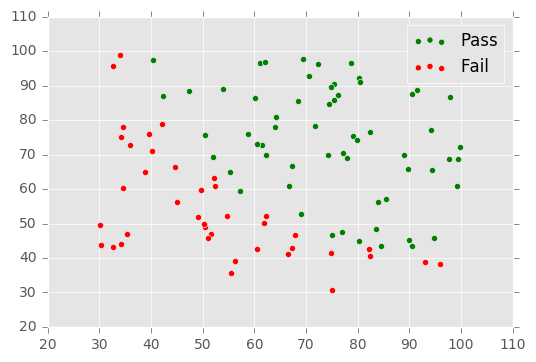

In [4]:
y = df.as_matrix(['Label'])
x = df.as_matrix(['Exam1','Exam2'])
pass_df =df[df['Label']==1]
fail_df =df[df['Label']==0]
plt.style.use('ggplot')
plt.figure(1)
plt.scatter(pass_df['Exam1'],pass_df['Exam2'],c='g')
plt.scatter(fail_df['Exam1'],fail_df['Exam2'],c='r')
plt.legend(['Pass','Fail'],loc=1)
plt.show()

In [18]:
clf = LogisticRegression()

In [19]:
clf.optm(x,y)

(3, 1)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(array([-25.1613185 ,   0.20623159,   0.20147148]), 36, 0)


In [ ]:
predicted_y = clf.predict(x)